In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage.io import imread,imshow

In [2]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

(<matplotlib.figure.Figure at 0x27dc53079e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27dc538de80>)

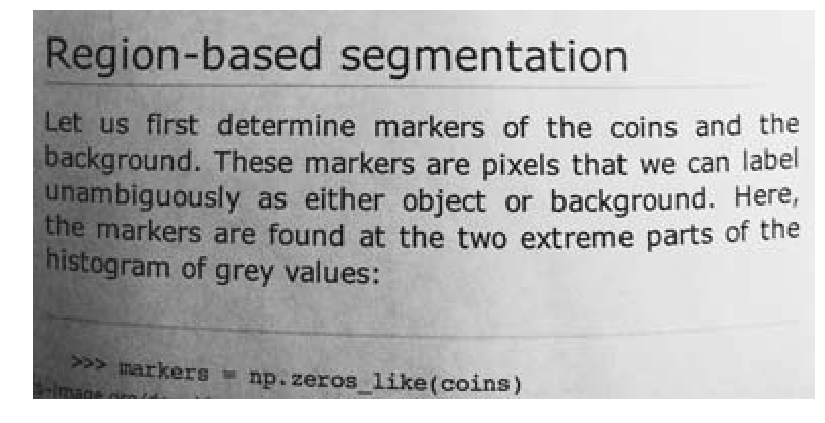

In [3]:
text = data.page()
image_show(text)

(<matplotlib.figure.Figure at 0x27dc58279b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27dc542c9b0>)

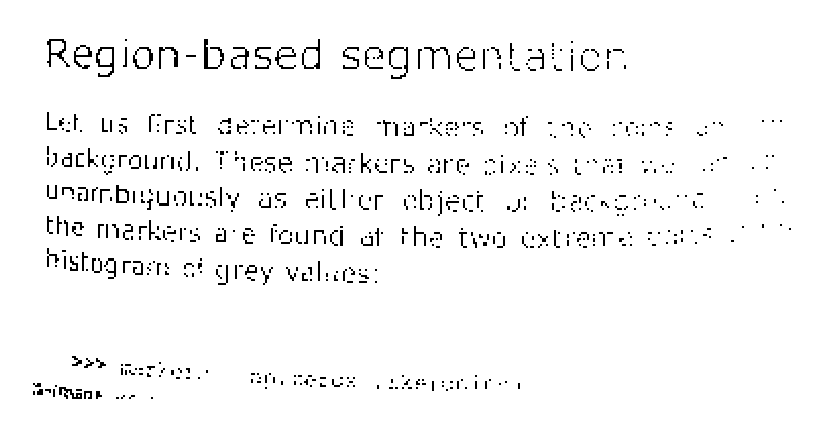

In [4]:
image_show( text > 50)

(<matplotlib.figure.Figure at 0x27dc5b012e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27dc5ad8550>)

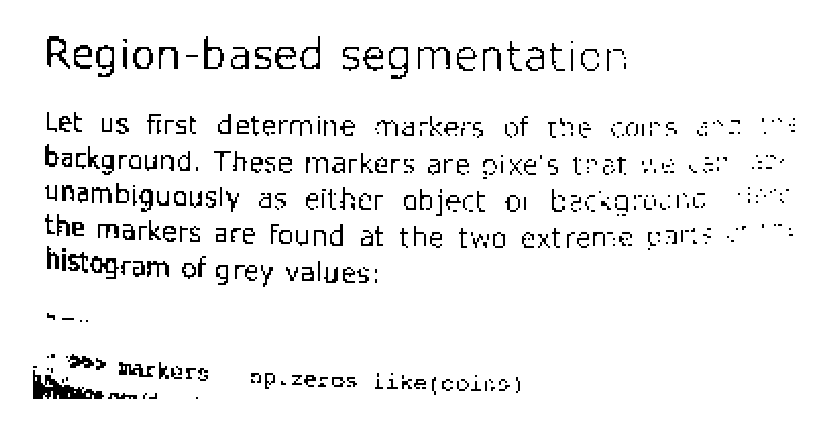

In [5]:
image_show( text > 70)

(<matplotlib.figure.Figure at 0x27dbef6e2e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27dc5b01f98>)

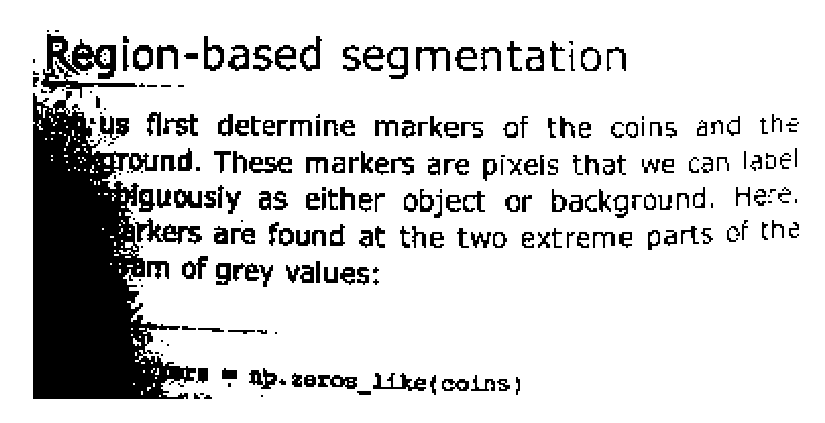

In [6]:
image_show( text > 120)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


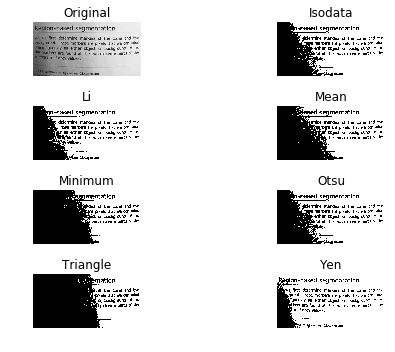

In [7]:
text_threshold = filters.try_all_threshold(text)
# image_show(text < text_threshold)

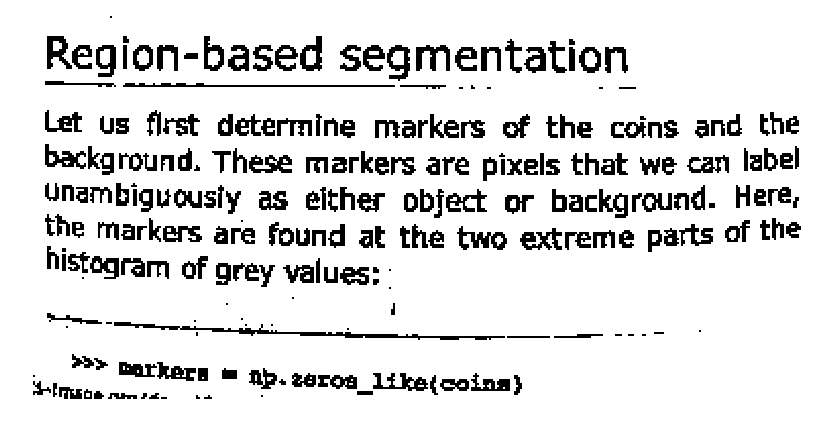

In [8]:
text_threshold = filters.threshold_local(text,block_size=51, offset=10) 
image_show(text > text_threshold);

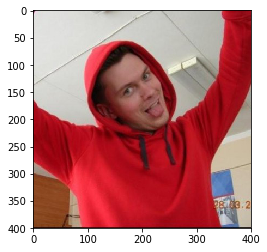

In [9]:
from skimage import io
from skimage.transform import resize
image = io.imread('6000069.jpeg') 

# h=image.shape[0]
# w=image.shape[1]
# image=resize(image, (h//12, w//12))

plt.imshow(image)

(<matplotlib.figure.Figure at 0x27dc5a17390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27dc6b8eb38>)

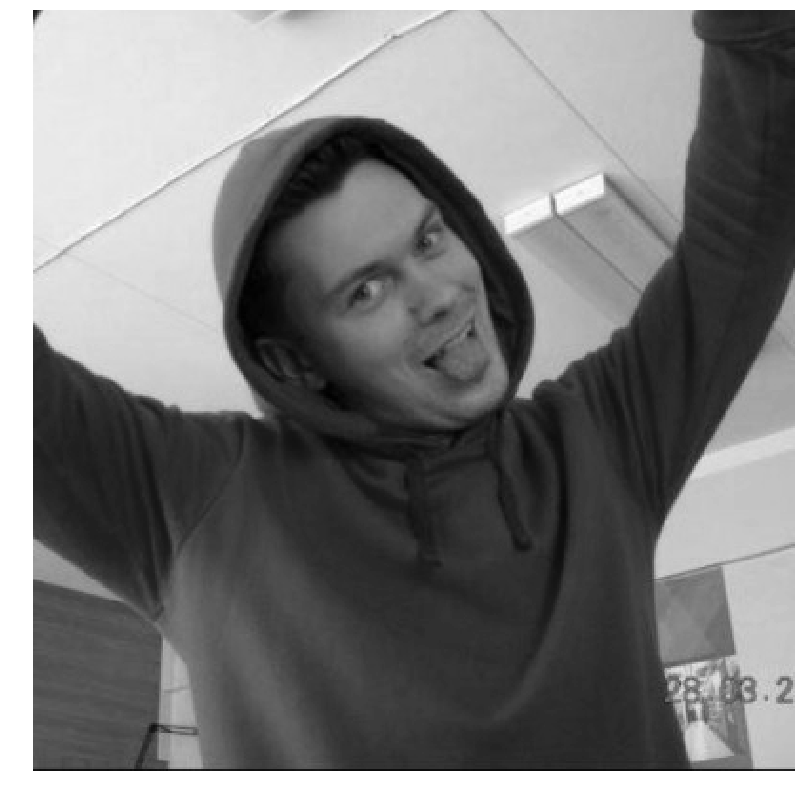

In [10]:
image_gray = color.rgb2gray(image) 
image_show(image_gray)

In [11]:
def circle_points(resolution, center, radius):

    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T

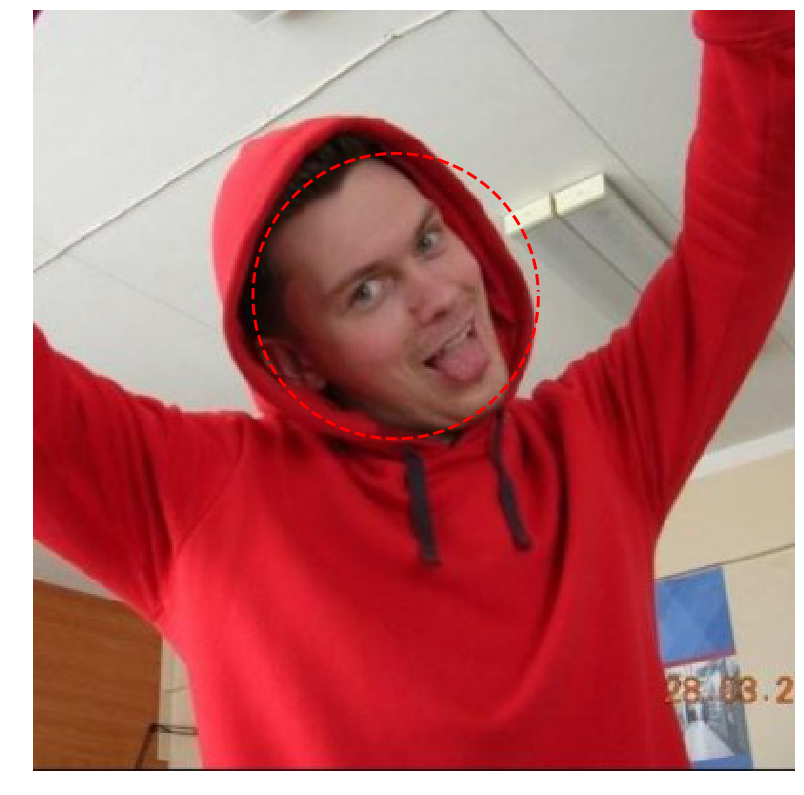

In [12]:
points = circle_points(200, [150, 190], 75)[:-1]
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

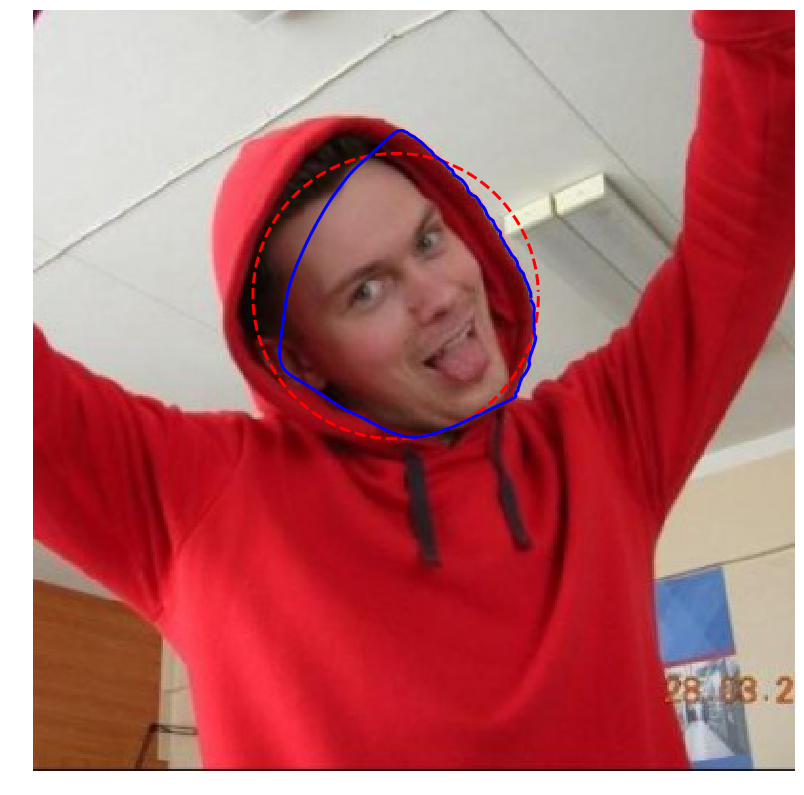

In [13]:
snake = seg.active_contour(image_gray, points,alpha=0.04,beta=0.3)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

(<matplotlib.figure.Figure at 0x27dc6b168d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27dc6c15a90>)

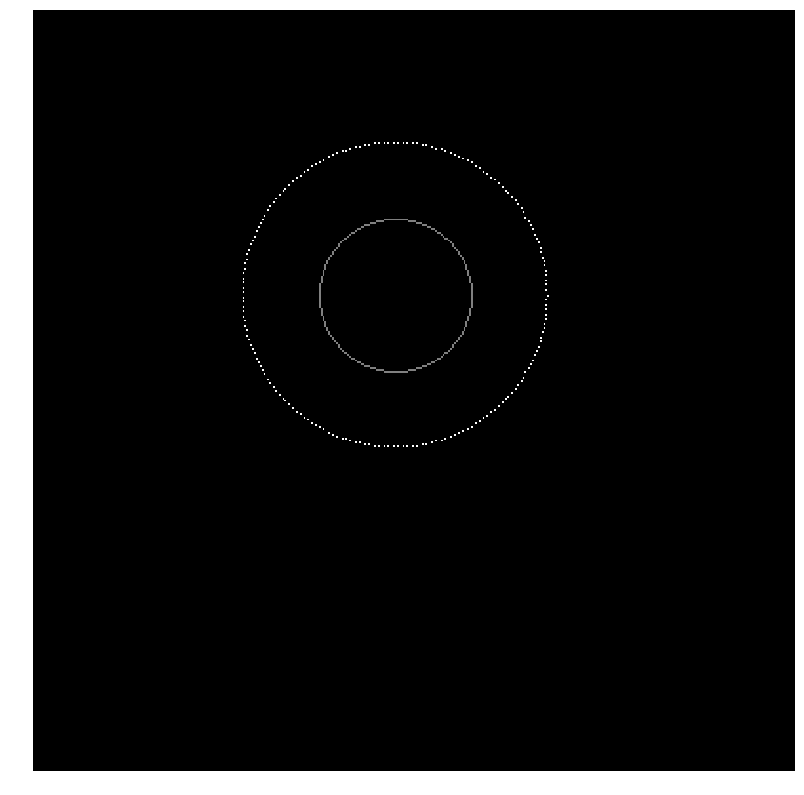

In [14]:
image_labels = np.zeros(image_gray.shape, dtype=np.uint8)
points = circle_points(200, [150, 190], 80)[:-1]
indices = draw.circle_perimeter(150,190,40)
image_labels[indices] = 1
image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2
image_show(image_labels)

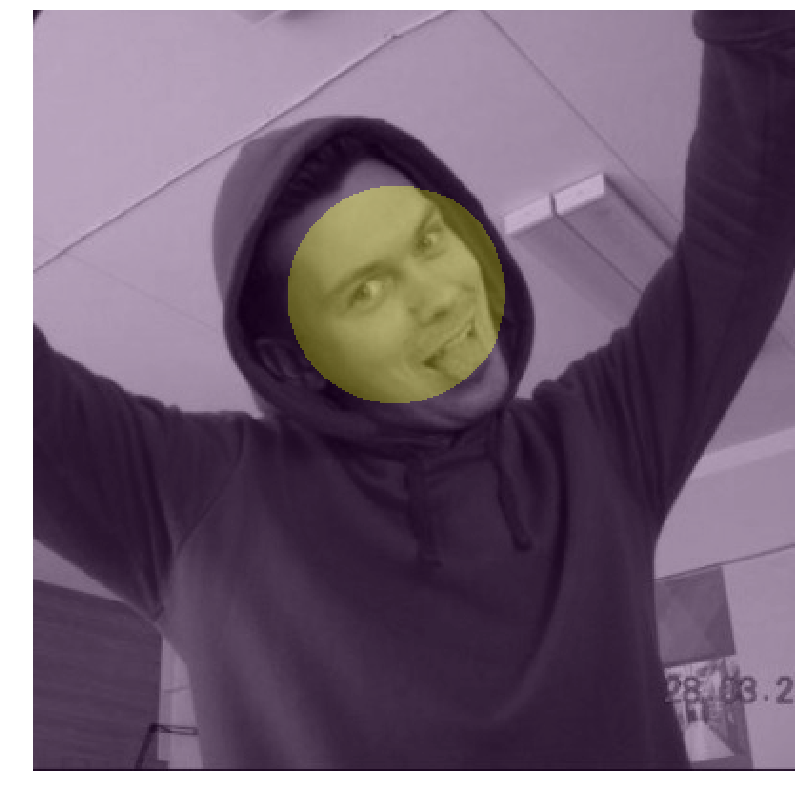

In [15]:
image_segmented = seg.random_walker(image_gray, image_labels)
# Chek our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3)

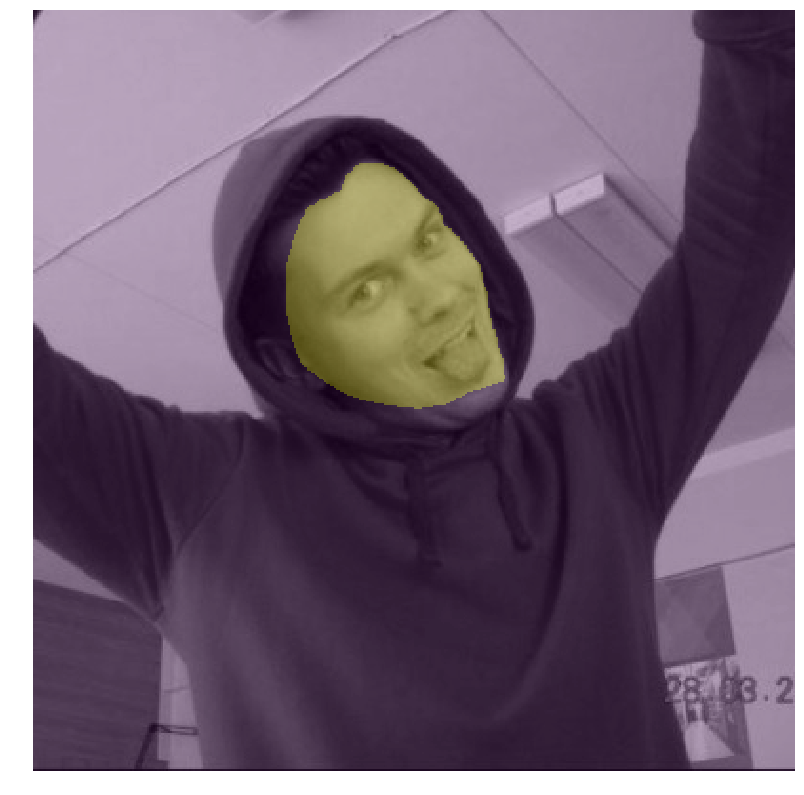

In [16]:
image_segmented = seg.random_walker(image_gray, image_labels, beta = 3000)
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3)

In [17]:
image_slic = seg.slic(image,n_segments=155)

(<matplotlib.figure.Figure at 0x27dc73065c0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27dc72eb0b8>)

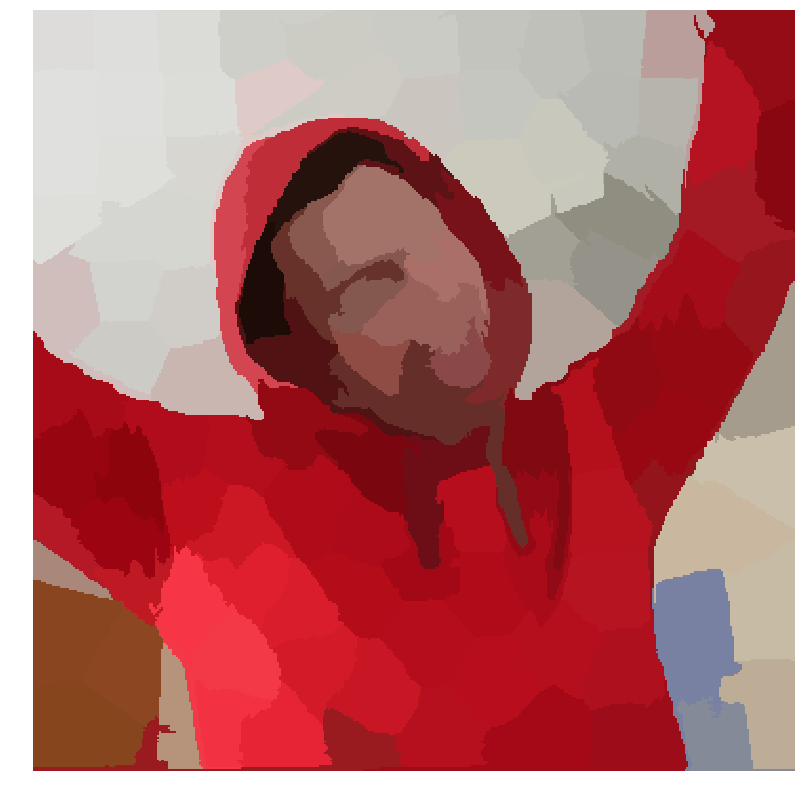

In [18]:
image_show(color.label2rgb(image_slic, image, kind='avg'))

(<matplotlib.figure.Figure at 0x27dc7364eb8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27dc7378d30>)

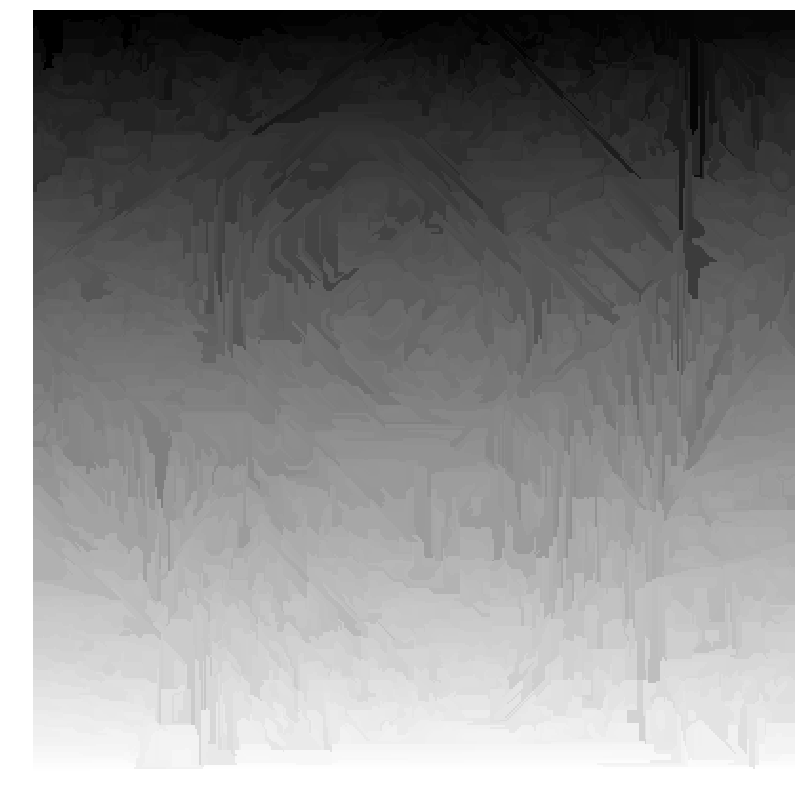

In [19]:
image_felzenszwalb = seg.felzenszwalb(image) 
image_show(image_felzenszwalb)

(<matplotlib.figure.Figure at 0x27dc872f518>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27dc876f320>)

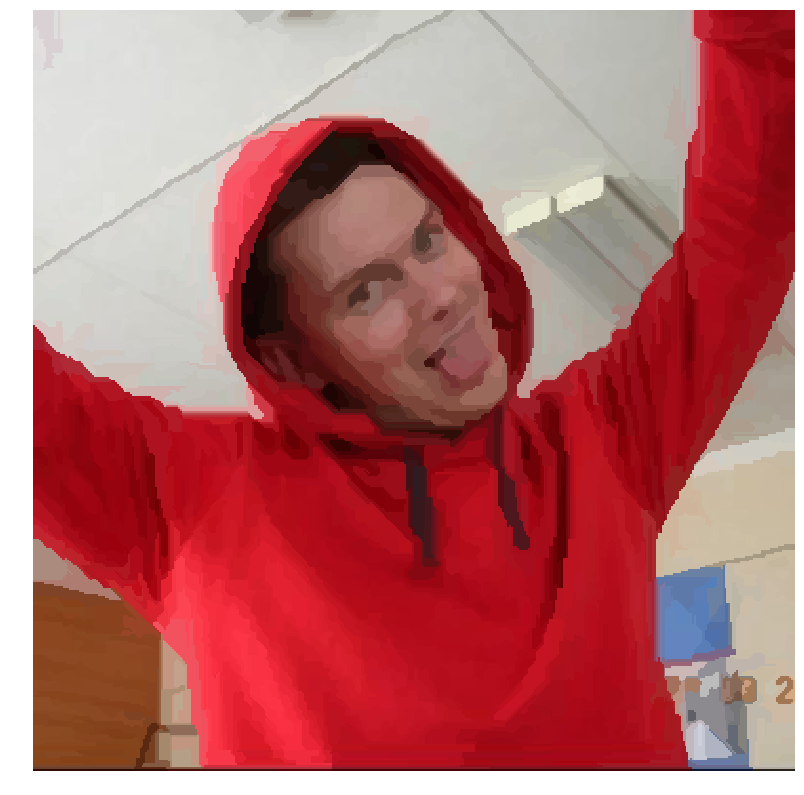

In [20]:
image_felzenszwalb_colored = color.label2rgb(image_felzenszwalb, image, kind='avg')
image_show(image_felzenszwalb_colored)

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


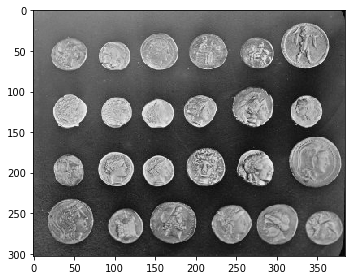

In [21]:
import numpy as np
from skimage import data
coins = data.coins()
histo = np.histogram(coins, bins=np.arange(0, 256))

imshow(coins)

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


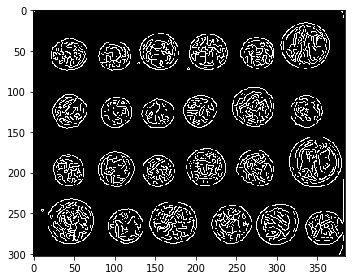

In [22]:
from skimage.feature import canny
edges = canny(coins/255.)

imshow(edges)

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


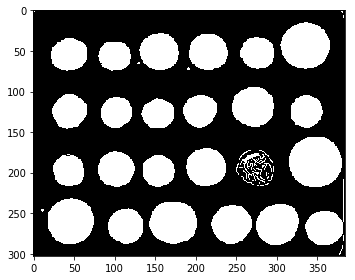

In [23]:
from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(edges)

imshow(fill_coins)

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


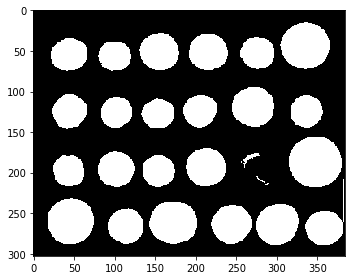

In [24]:
label_objects, nb_labels = ndi.label(fill_coins)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0
coins_cleaned = mask_sizes[label_objects]

imshow(coins_cleaned)

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


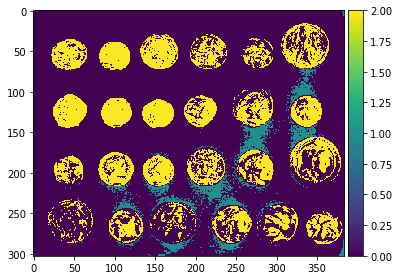

In [25]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2
imshow(markers)

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


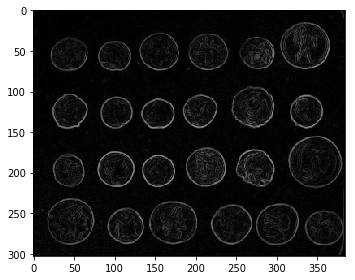

In [26]:
from skimage.filters import sobel
elevation_map = sobel(coins)

imshow(elevation_map)

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


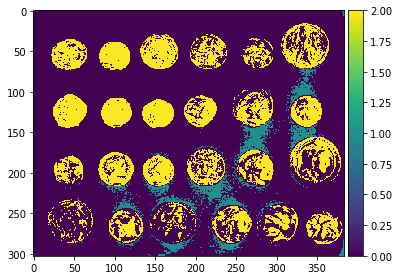

In [27]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

imshow(markers)

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


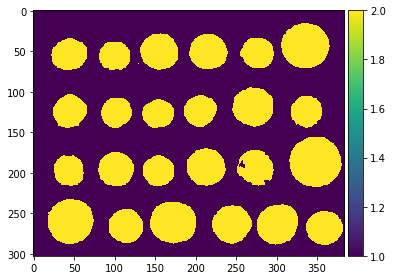

In [28]:
from skimage.morphology import watershed
segmentation = watershed(elevation_map, markers)

imshow(segmentation)

In [29]:
segmentation = ndi.binary_fill_holes(segmentation - 1)

In [30]:
labeled_coins, _ = ndi.label(segmentation)

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


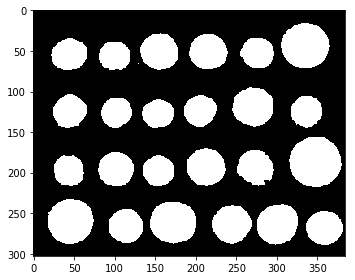

In [31]:
imshow(segmentation)

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


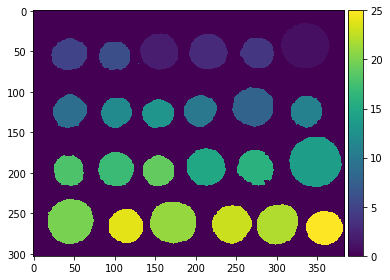

In [32]:
imshow(labeled_coins)

In [33]:
# добавим необходимый пакет с opencv
import cv2
 
# загружаем изображение и отображаем его
image = cv2.imread("matrix-sunglasses-768x320.jpg")
# cv2.imshow("Original image", image)
# cv2.waitKey(0)

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


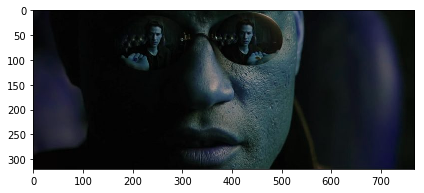

In [34]:
imshow(image)

In [35]:
image.shape

(320, 768, 3)

In [36]:
final_wide = 200
r = float(final_wide) / image.shape[1]
dim = (final_wide, int(image.shape[0] * r))
 
# уменьшаем изображение до подготовленных размеров
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


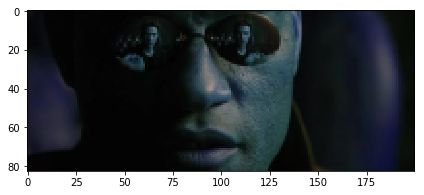

In [37]:
imshow(resized)

In [38]:
cropped = image[30:130, 150:300]

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


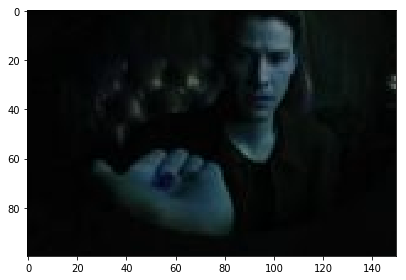

In [39]:
imshow(cropped)

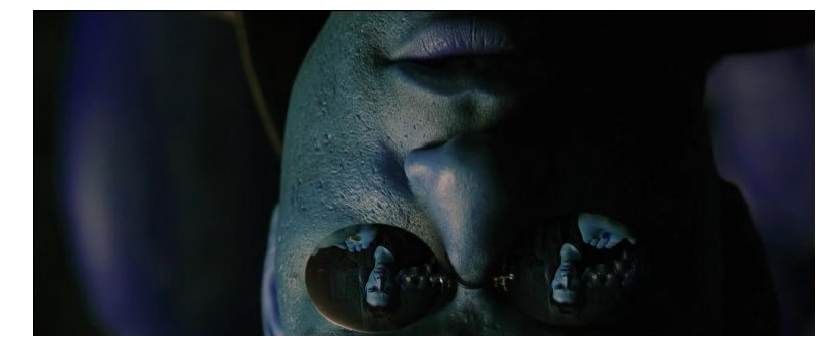

In [40]:
import numpy as np
import cv2

# получим размеры изображения для поворота
# и вычислим центр изображения
(h, w) = image.shape[:2]
center = (w / 2, h / 2)
 
# повернем изображение на 180 градусов
M = cv2.getRotationMatrix2D(center, 180, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
image_show(rotated)
plt.show()

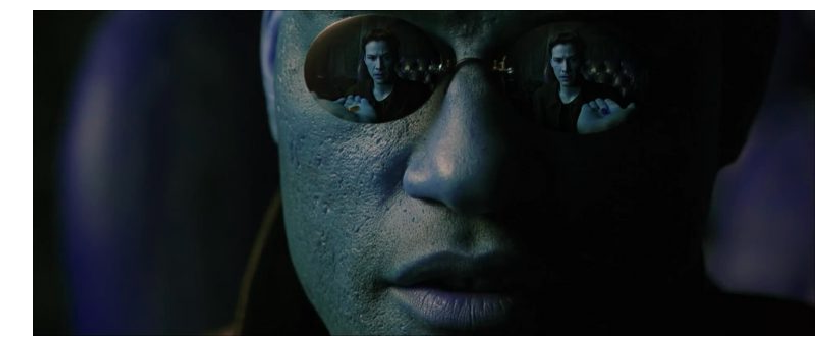

In [41]:
#отразим изображение по горизонтали
flip_image = cv2.flip(image,1)
#cv2.imshow("Flip image", flip_image)
#cv2.waitKey(0)
image_show(flip_image)
plt.show()